In [1]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
dashboard = pd.read_excel(
    "dashboard_data.xlsx",
    sheet_name="Spending & Utilization YTD 2023"
)
dashboard.shape


(3601, 45)

In [4]:
dashboard = dashboard.iloc[2:].reset_index(drop=True)
dashboard.columns = dashboard.iloc[0]
dashboard = dashboard.iloc[1:].reset_index(drop=True)

dashboard

,Brand Name,Generic Name,Number of Manufacturers,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Change in Average Spending Per Dosage Unit (2022-2023),Annual Growth Rate in Average Spending Per Dosage Unit (2019-2023)
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,139201.68,642471,5392,1878,0.216788,25.816335,74.1223,0,118923.24,547006,4457,1595,0.217701,26.682351,74.560025,0,102280.76,459384,3708,1313,0.223001,27.583808,77.898522,0,70039.61,310304,2501,1147,0.225874,28.004642,61.063304,0,44355.04,195672,1613,699,0.227162,27.498475,63.454993,0,0.005702,0.011754
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,343031.42,1830596,14581,5319,0.187389,23.525919,64.491713,0,210217.15,1046616,8408,3905,0.200851,25.00204,53.832817,0,131927.33,566872,4564,1766,0.232812,28.906076,74.704037,0,114601.54,486206,3846,1474,0.235708,29.797592,77.74867,0,97951.18,406617,3269,1267,0.240932,29.963652,77.309534,0,0.022165,0.064848
2,Abacavir,Abacavir Sulfate,5,10110328.45,3316293,42629,6085,3.482725,237.1702,1661.51659,0,9196378.7,2959278,37102,5068,3.491204,247.867465,1814.597218,0,7027816.23,2498928,30488,4254,3.185837,230.510897,1652.048949,0,6943055.75,2034487,24294,3452,3.871065,285.793025,2011.313948,0,5287295.41,1648593,19632,2809,3.594357,269.320263,1882.269637,0,-0.071481,0.007919
3,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,4,13057135.83,1160969,34814,6423,11.242099,375.054169,2032.87184,0,9173796.65,821560,23603,4752,11.162574,388.67079,1930.512763,0,9037539.9,1074836,28345,4032,8.41202,318.840709,2241.453348,1,11949195.88,988848,24962,3427,12.035735,478.695452,3486.780239,0,9999234.5,827085,20201,2892,12.057845,494.987105,3457.549965,0,0.001837,0.017667
4,Abilify,Aripiprazole,1,26854630.75,808281.5,20939,3670,33.402208,1282.517348,7317.338079,0,24481910.61,716447.5,17689,2532,34.436527,1384.018916,9669.001031,0,20484851.18,633899,15261,2174,32.656164,1342.300713,9422.654637,0,13141218.3,575817,13586,1920,23.109644,967.261762,6844.384531,0,11882943.19,516496.25,12115,1736,23.319755,980.845496,6845.013358,0,0.009092,-0.085914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,Zyprexa Zydis,Olanzapine,1,4256814.91,143093,3130,349,30.396232,1360.004764,12197.177393,0,4230636.84,137133,2913,320,31.193752,1452.329845,13220.740125,0,3792411.19,118783,2438,292,32.585698,1555.541915,12987.709555,0,3550664.09,109483,2178,277,32.822823,1630.240629,12818.281913,0,3475505.18,105564,2117,259,33.259498,1641.712414,13418.938919,0,0.013304,0.022761
3594,Zyprexa*,Olanzapine,1,18813188.07,728523.5,16413,2126,26.90537,1146.237012,8849.100691,0,18507490.18,696363,14890,1782,27.402873,1242.947628,10385.796958,0,17331353.7,624935,12982,1532,28.686997,1335.029556,11312.89406,0,15998192.55,553380.5,11473,1392,29.911426,1394.421036,11492.954418,0,15496873.87,514261.5,10523,1383,31.602266,1472.666908,11205.259487,0,0.056528,0.041046
3595,Zytiga,Abiraterone Acetate,2,760373176.8,5827921,70856,13091,146.458287,1073

In [5]:
dashboard.columns = (
    dashboard.columns.astype(str)
    .str.strip()
    .str.replace('\n', ' ', regex=True)
    .str.replace(' +', ' ', regex=True)
    .str.lower()
    .str.replace(' ', '_')
)
dashboard.columns[:20]


Index(['brand_name', 'generic_name', 'number_of_manufacturers',
       'total_spending', 'total_dosage_units', 'total_claims',
       'total_beneficiaries', 'average_spending_per_dosage_unit_(weighted)',
       'average_spending_per_claim', 'average_spending_per_beneficiary',
       'outlier_flag', 'total_spending', 'total_dosage_units', 'total_claims',
       'total_beneficiaries', 'average_spending_per_dosage_unit_(weighted)',
       'average_spending_per_claim', 'average_spending_per_beneficiary',
       'outlier_flag', 'total_spending'],
      dtype='object', name=0)

In [6]:
base_cols = ["brand_name", "generic_name", "number_of_manufacturers"]

cols_2023 = [
    "total_spending", "total_dosage_units", "total_claims", "total_beneficiaries",
    "average_spending_per_dosage_unit_(weighted)", "average_spending_per_claim",
    "average_spending_per_beneficiary", "outlier_flag",
    "change_in_average_spending_per_dosage_unit_(2022_2023)",
    "annual_growth_rate_in_average_spending_per_dosage_unit_(2019_2023)"
]

existing_cols = [c for c in cols_2023 if c in dashboard.columns]
dashboard_2023 = dashboard[base_cols + existing_cols].copy()
dashboard_2023["year"] = 2023
dashboard_2023.shape


(3598, 44)

In [7]:
dashboard_2023

,brand_name,generic_name,number_of_manufacturers,total_spending,total_spending,total_spending,total_spending,total_spending,total_dosage_units,total_dosage_units,total_dosage_units,total_dosage_units,total_dosage_units,total_claims,total_claims,total_claims,total_claims,total_claims,total_beneficiaries,total_beneficiaries,total_beneficiaries,total_beneficiaries,total_beneficiaries,average_spending_per_dosage_unit_(weighted),average_spending_per_dosage_unit_(weighted),average_spending_per_dosage_unit_(weighted),average_spending_per_dosage_unit_(weighted),average_spending_per_dosage_unit_(weighted),average_spending_per_claim,average_spending_per_claim,average_spending_per_claim,average_spending_per_claim,average_spending_per_claim,average_spending_per_beneficiary,average_spending_per_beneficiary,average_spending_per_beneficiary,average_spending_per_beneficiary,average_spending_per_beneficiary,outlier_flag,outlier_flag,outlier_flag,outlier_flag,outlier_flag,year
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,139201.68,118923.24,102280.76,70039.61,44355.04,642471,547006,459384,310304,195672,5392,4457,3708,2501,1613,1878,1595,1313,1147,699,0.216788,0.217701,0.223001,0.225874,0.227162,25.816335,26.682351,27.583808,28.004642,27.498475,74.1223,74.560025,77.898522,61.063304,63.454993,0,0,0,0,0,2023
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,343031.42,210217.15,131927.33,114601.54,97951.18,1830596,1046616,566872,486206,406617,14581,8408,4564,3846,3269,5319,3905,1766,1474,1267,0.187389,0.200851,0.232812,0.235708,0.240932,23.525919,25.00204,28.906076,29.797592,29.963652,64.491713,53.832817,74.704037,77.74867,77.309534,0,0,0,0,0,2023
2,Abacavir,Abacavir Sulfate,5,10110328.45,9196378.7,7027816.23,6943055.75,5287295.41,3316293,2959278,2498928,2034487,1648593,42629,37102,30488,24294,19632,6085,5068,4254,3452,2809,3.482725,3.491204,3.185837,3.871065,3.594357,237.1702,247.867465,230.510897,285.793025,269.320263,1661.51659,1814.597218,1652.048949,2011.313948,1882.269637,0,0,0,0,0,2023
3,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,4,13057135.83,9173796.65,9037539.9,11949195.88,9999234.5,1160969,821560,1074836,988848,827085,34814,23603,28345,24962,20201,6423,4752,4032,3427,2892,11.242099,11.162574,8.41202,12.035735,12.057845,375.054169,388.67079,318.840709,478.695452,494.987105,2032.87184,1930.512763,2241.453348,3486.780239,3457.549965,0,0,1,0,0,2023
4,Abilify,Aripiprazole,1,26854630.75,24481910.61,20484851.18,13141218.3,11882943.19,808281.5,716447.5,633899,575817,516496.25,20939,17689,15261,13586,12115,3670,2532,2174,1920,1736,33.402208,34.436527,32.656164,23.109644,23.319755,1282.517348,1384.018916,1342.300713,967.261762,980.845496,7317.338079,9669.001031,9422.654637,6844.384531,6845.013358,0,0,0,0,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,Zyprexa Zydis,Olanzapine,1,4256814.91,4230636.84,3792411.19,3550664.09,3475505.18,143093,137133,118783,109483,105564,3130,2913,2438,2178,2117,349,320,292,277,259,30.396232,31.193752,32.585698,32.822823,33.259498,1360.004764,1452.329845,1555.541915,1630.240629,1641.712414,12197.177393,13220.740125,12987.709555,12818.281913,13418.938919,0,0,0,0,0,2023
3594,Zyprexa*,Olanzapine,1,18813188.07,18507490.18,17331353.7,15998192.55,15496873.87,728523.5,696363,624935,553380.5,514261.5,16413,14890,12982,11473,10523,2126,1782,1532,1392,1383,26.90537,27.402873,28.686997,29.911426,31.602266,1146.237012,1242.947628,1335.029556,1394.421036,1472.666908,8849.100691,10385.796958,11312.89406,11492.954418,11205.259487,0,0,0,0,0,2023
3595,Zytiga,Abiraterone Acetate,2,760373176.8,347156246.34,127825785.81,54212440.84,33242471.65,5827921,2280348,903474,405158,255517,70856,32446,12303,5190,3147,13091,5877,2329,908,562,146.458287,164.5548,155.611256,149.760206,145.798581,10731.246144,10699.508301,10389.806211,10445.557002,10563.225818,58083.658758,59070.315865,54884.

In [8]:
dashboard_2023 = dashboard_2023.loc[:, ~dashboard_2023.columns.duplicated(keep='last')]


In [9]:
dashboard_2023.loc[:, "brand_name"] = dashboard_2023["brand_name"].astype(str).str.strip().str.title()
dashboard_2023.loc[:, "generic_name"] = dashboard_2023["generic_name"].astype(str).str.strip().str.title()
dashboard_2023.loc[:, "number_of_manufacturers"] = dashboard_2023["number_of_manufacturers"].astype(str).str.strip()


In [10]:
num_cols = [
    "total_spending", "total_dosage_units", "total_claims", "total_beneficiaries",
    "average_spending_per_dosage_unit_(weighted)",
    "average_spending_per_claim", "average_spending_per_beneficiary"
]
dashboard_2023.loc[:, num_cols] = (
    dashboard_2023.loc[:, num_cols]
    .replace('[\$,]', '', regex=True)
    .apply(pd.to_numeric, errors='coerce')
)


In [11]:
dashboard_2023.loc[:, "average_spending_per_claim"] = (
    dashboard_2023.loc[:, "total_spending"] / dashboard_2023.loc[:, "total_claims"]
)

In [12]:
dashboard_2023.loc[: ,num_cols] = dashboard_2023.loc[:, num_cols].fillna(0)
dashboard_2023 = dashboard_2023.drop_duplicates(subset=["brand_name", "generic_name"])


In [13]:
def classify_drug_type(row):
    brand = str(row['brand_name']).strip().lower()
    generic = str(row['generic_name']).strip().lower()
    
    if brand == "" or brand == "nan":
        return "Unknown"
    if generic == "" or generic == "nan":
        return "Brand"
    if brand == generic:
        return "Generic"
    if generic in brand:
        return "Generic"
    return "Brand"

dashboard_2023["drug_type"] = dashboard_2023.apply(classify_drug_type, axis=1)
dashboard_2023["drug_type"].value_counts()


drug_type
Brand      2763
Generic     835
Name: count, dtype: int64

In [14]:
dashboard_2023[num_cols].describe().T


,count,unique,top,freq
0,,,,
total_spending,3598.0,3598.0,29011.270000,1.0
total_dosage_units,3598.0,3537.0,1950.000000,4.0
total_claims,3598.0,2769.0,13.000000,18.0
total_beneficiaries,3598.0,2334.0,0.000000,194.0
average_spending_per_dosage_unit_(weighted),3598.0,3598.0,0.156035,1.0
average_spending_per_claim,3598.0,3598.0,341.309059,1.0
average_spending_per_beneficiary,3598.0,3405.0,0.000000,194.0


In [15]:
dashboard_2023["total_spending"] = (
    dashboard_2023["total_spending"]
    .replace('[\$,]', '', regex=True)
    .astype(str)
    .str.strip()
    .astype(float)
)


/tmp/ipykernel_194/640521900.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


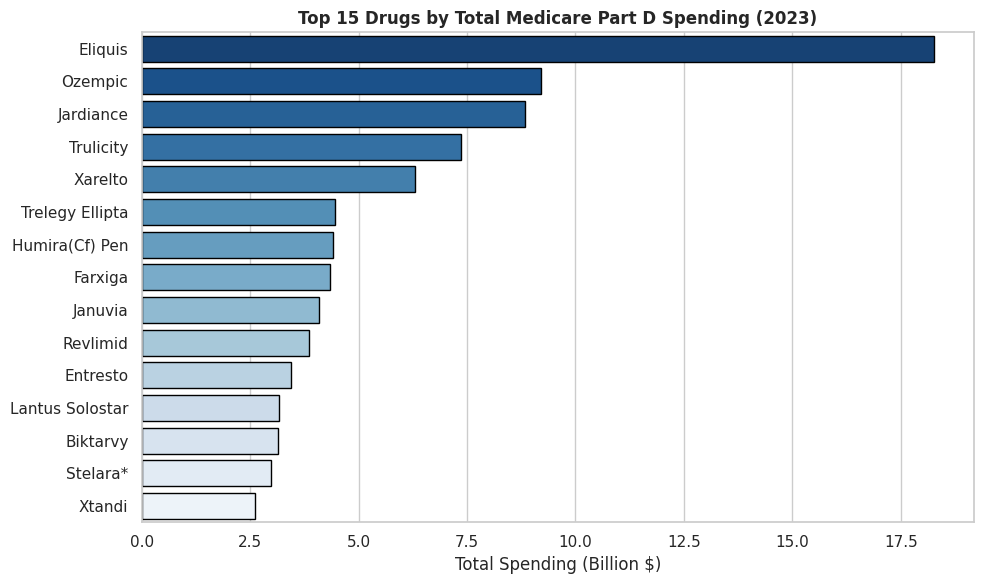

In [16]:
top15 = dashboard_2023.nlargest(15, "total_spending").copy()
top15["total_spending_billion"] = top15["total_spending"] / 1e9

plt.figure(figsize=(10,6))
sns.barplot(
    y="brand_name",
    x="total_spending_billion",
    data=top15,
    palette="Blues_r",
    edgecolor="black"
)
plt.title("Top 15 Drugs by Total Medicare Part D Spending (2023)", fontweight = 'bold')
plt.xlabel("Total Spending (Billion $)")
plt.ylabel("")

plt.tight_layout()
plt.show()


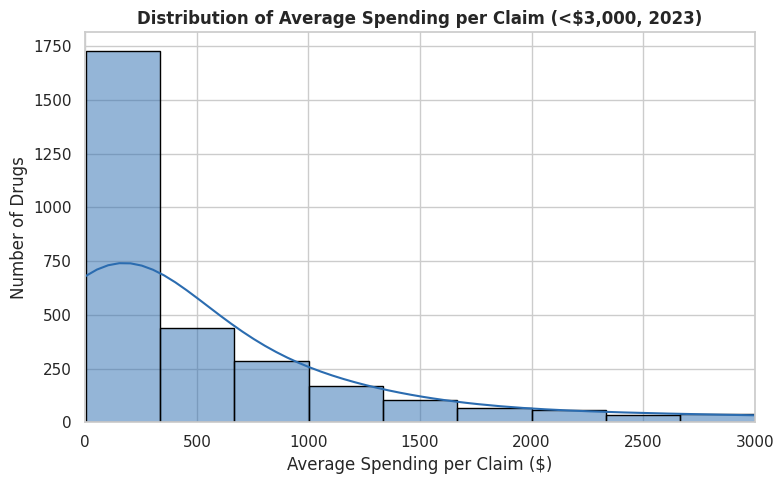

In [17]:
plt.figure(figsize=(8,5))
subset = dashboard_2023[
    (dashboard_2023["average_spending_per_claim"] > 0) &
    (dashboard_2023["average_spending_per_claim"] < 10000)
]
sns.histplot(
    subset["average_spending_per_claim"],
    bins=30,           # fewer bins → wider bars
    kde=True,
    color="#2b6cb0",
    edgecolor="black"  # consistent with barplot formatting
)
plt.xlim(0, 3000)  # zoom in on main range
plt.title("Distribution of Average Spending per Claim (<$3,000, 2023)",
          fontweight="bold")
plt.xlabel("Average Spending per Claim ($)")
plt.ylabel("Number of Drugs")
plt.tight_layout()
plt.show()


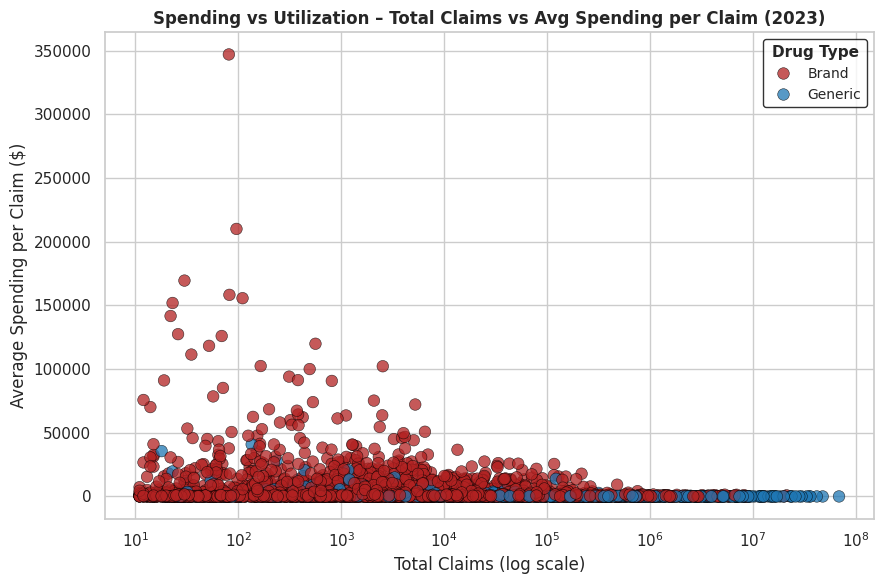

In [18]:
plt.figure(figsize=(9,6))
sns.set_style("whitegrid")  # clean white background with subtle gridlines

sns.scatterplot(
    data=dashboard_2023,
    x="total_claims",
    y="average_spending_per_claim",
    hue="drug_type",
    alpha=0.75,
    s=70,  # slightly larger points
    edgecolor="black",
    linewidth=0.4,
    palette={"Brand": "#b22222", "Generic": "#1f77b4"}  # cohesive theme colors
)
plt.xscale("log")
plt.title("Spending vs Utilization – Total Claims vs Avg Spending per Claim (2023)",
          fontweight="bold")
plt.xlabel("Total Claims (log scale)")
plt.ylabel("Average Spending per Claim ($)")

# Clean, styled legend
legend = plt.legend(title="Drug Type", title_fontsize=11, fontsize=10, frameon=True, edgecolor="black")
plt.setp(legend.get_title(), fontweight="bold")

plt.tight_layout()
plt.show()


/tmp/ipykernel_194/3196925400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


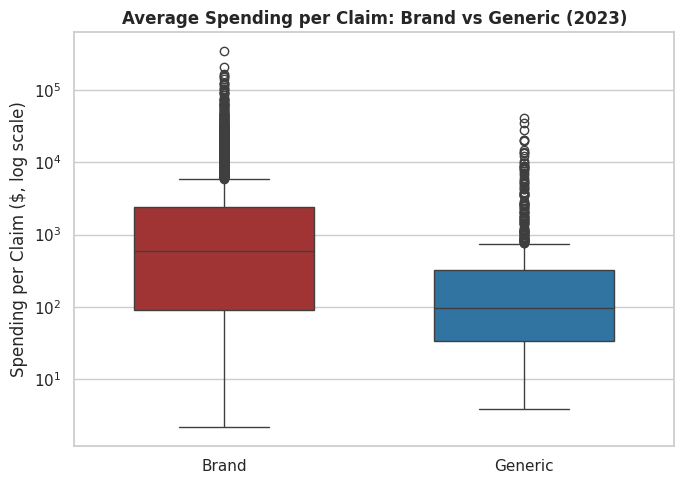

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=dashboard_2023,
    x="drug_type",
    y="average_spending_per_claim",
    palette={"Brand": "#b22222", "Generic": "#1f77b4"},  # same colors as your theme
    width=0.6
)
plt.yscale("log")
plt.title("Average Spending per Claim: Brand vs Generic (2023)", fontweight="bold")
plt.ylabel("Spending per Claim ($, log scale)")
plt.xlabel("")
plt.tight_layout()
plt.show()


In [20]:
dashboard_2023.groupby("drug_type")[["total_claims", "average_spending_per_claim"]].median()


,total_claims,average_spending_per_claim
drug_type,,
Brand,1651.0,594.819043
Generic,66353.0,95.713437


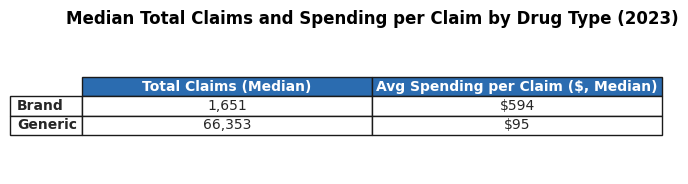

In [21]:
import matplotlib.pyplot as plt

# Calculate medians
summary = (
    dashboard_2023
    .groupby("drug_type")[["total_claims", "average_spending_per_claim"]]
    .median()
    .round(0)
)

# Format data for display
cell_text = [[f"{int(a):,}", f"${int(b):,}"] for a, b in summary.values]

# Create and style table
fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')

tbl = ax.table(
    cellText=cell_text,
    rowLabels=summary.index,
    colLabels=["Total Claims (Median)", "Avg Spending per Claim ($, Median)"],
    cellLoc='center',
    loc='center'
)

# Style header and text
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.3)
for (row, col), cell in tbl.get_celld().items():
    if row == 0:
        cell.set_facecolor("#2b6cb0")
        cell.set_text_props(color="white", fontweight="bold")
    elif col == -1:
        cell.set_text_props(fontweight="bold")

plt.title(
    "Median Total Claims and Spending per Claim by Drug Type (2023)",
    fontweight="bold",
    color="black",
    pad=10
)

plt.tight_layout()
plt.show()


In [22]:
#when DO PATENTS LOSE PROTECTION
products = pd.read_csv("products.txt", delimiter="~", dtype=str)
patent = pd.read_csv("patent.txt", delimiter="~", dtype=str)
exclusivity = pd.read_csv("exclusivity.txt", delimiter="~", dtype=str)

# === 2. Clean column names ===
for df in [products, patent, exclusivity]:
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(' ', '_')
    )

# === 3. Clean and prepare patent data ===
patent["patent_expire_date"] = pd.to_datetime(patent["patent_expire_date_text"], errors="coerce")
patent_clean = patent[["appl_type", "appl_no", "patent_no", "patent_expire_date"]].dropna(subset=["patent_expire_date"])

# === 4. Clean and prepare products data ===
products_clean = products[["trade_name", "appl_no", "ingredient"]].dropna(subset=["appl_no"])
products_clean["trade_name_clean"] = products_clean["trade_name"].str.lower().str.strip()

# === 5. Merge products + patent ===
orangebook = pd.merge(products_clean, patent_clean, on="appl_no", how="left")

# keep only NDA (brand) drugs
orangebook = orangebook[orangebook["appl_type"] == "N"]

# earliest patent expiry per trade name
orangebook = (
    orangebook.groupby("trade_name_clean", as_index=False)["patent_expire_date"]
    .min()
)

print("Unique brand drugs with patent data:", orangebook.shape[0])
orangebook.head()


Unique brand drugs with patent data: 1246


,trade_name_clean,patent_expire_date
0,abilify,2025-01-21
1,abilify asimtufii,2025-03-15
2,abilify maintena kit,2025-03-15
3,abilify mycite kit,2026-04-28
4,abraxane,2025-04-27


/tmp/ipykernel_194/1529904993.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


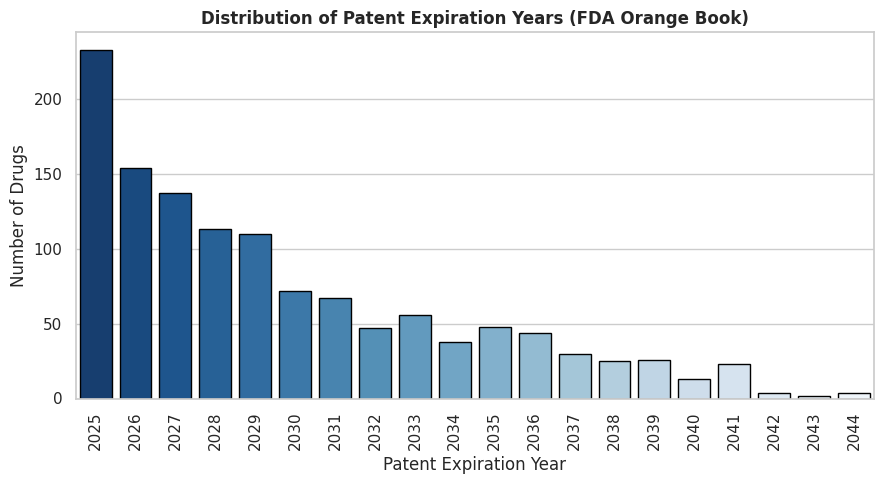

In [23]:
# Convert patent years to integers (ignore NaNs)
orangebook["patent_year"] = orangebook["patent_expire_date"].dt.year.astype("Int64")

# Count how many drugs per expiration year
year_counts = (
    orangebook.groupby("patent_year")["trade_name_clean"]
    .count()
    .reset_index()
    .rename(columns={"trade_name_clean": "num_drugs"})
)

# Remove missing years (NaNs)
year_counts = year_counts[year_counts["patent_year"].notna()]

# --- Plot ---
plt.figure(figsize=(9,5))
sns.barplot(
    data=year_counts.sort_values("patent_year"),
    x="patent_year",
    y="num_drugs",
    palette="Blues_r",
    edgecolor="black"
)
plt.title("Distribution of Patent Expiration Years (FDA Orange Book)", fontweight = "bold")
plt.xlabel("Patent Expiration Year")
plt.ylabel("Number of Drugs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [24]:
dashboard_2023["brand_name_clean"] = dashboard_2023["brand_name"].str.lower().str.strip()

merged_ob = pd.merge(
    dashboard_2023,
    orangebook,
    left_on="brand_name_clean",
    right_on="trade_name_clean",
    how="left"
)
merged_ob["patent_expire_date"] = pd.to_datetime(merged_ob["patent_expire_date"], errors="coerce")
merged_ob = merged_ob.drop_duplicates(subset=["brand_name"], keep="first")
print("Merged CMS + Orange Book drugs:", merged_ob.shape[0])


Merged CMS + Orange Book drugs: 3474


/tmp/ipykernel_194/1044840221.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


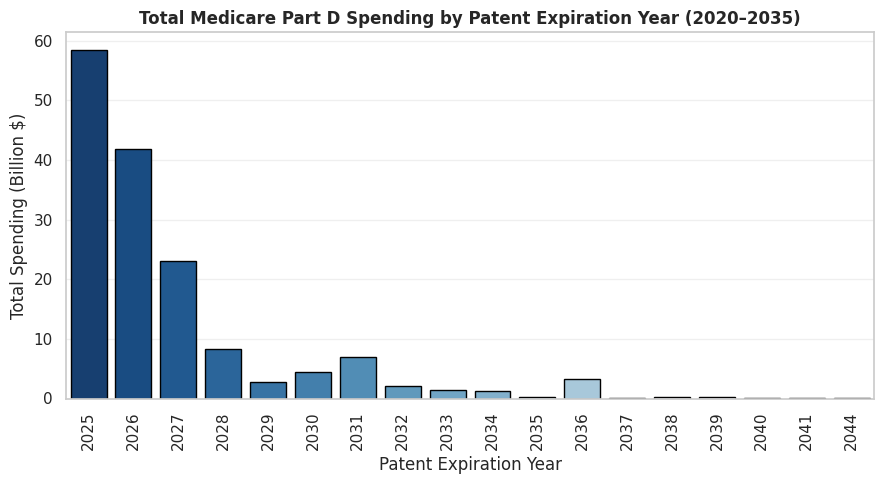

In [25]:
# Convert patent_year to integer (safe for plotting)
merged_ob["patent_year"] = merged_ob["patent_expire_date"].dt.year.astype("Int64")

# Filter realistic window and aggregate spending
spending_by_year = (
    merged_ob[merged_ob["patent_year"].between(2020, 2044, inclusive="both")]
    .groupby("patent_year", dropna=True)["total_spending"]
    .sum()
    .reset_index()
)

# Convert to billions for readability
spending_by_year["total_spending_billion"] = spending_by_year["total_spending"] / 1e9

# --- Plot ---
plt.figure(figsize=(9,5))
sns.barplot(
    data=spending_by_year.sort_values("patent_year"),
    x="patent_year",
    y="total_spending_billion",
    palette="Blues_r",
    edgecolor="black"
)
plt.title("Total Medicare Part D Spending by Patent Expiration Year (2020–2035)", fontweight="bold")
plt.xlabel("Patent Expiration Year")
plt.ylabel("Total Spending (Billion $)")
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Number of upcoming LOE drugs (2022–2026): 251
/tmp/ipykernel_194/276041839.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


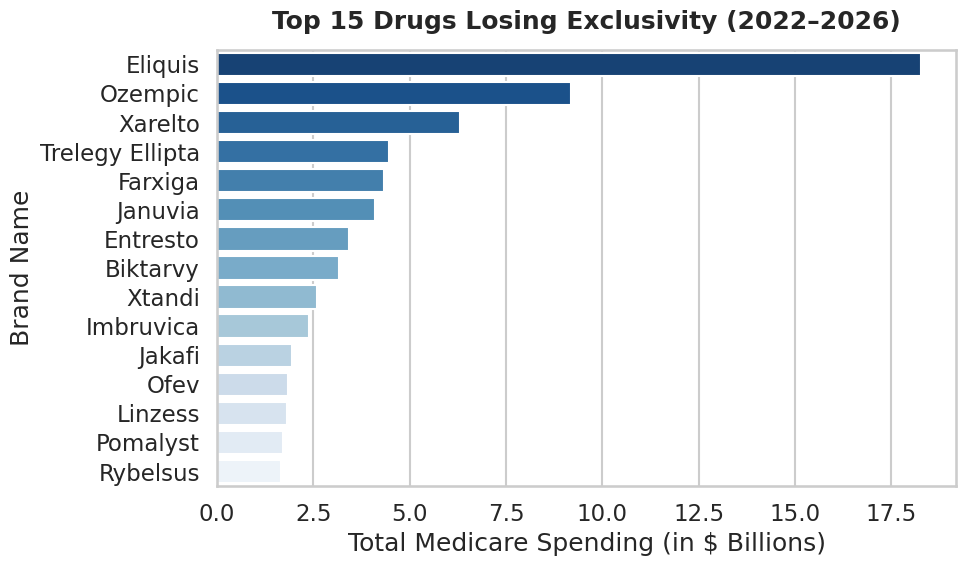

In [26]:
# Filter and sort
loe_window = (
    merged_ob[
        merged_ob["patent_expire_date"].between("2022-01-01", "2026-12-31")
    ][["brand_name", "total_spending", "patent_expire_date"]]
    .sort_values("total_spending", ascending=False)
)

print("Number of upcoming LOE drugs (2022–2026):", loe_window.shape[0])

# Top 15
top15 = loe_window.head(15).copy()

# Optional: convert spending to billions for cleaner display
top15["total_spending_bil"] = top15["total_spending"] / 1e9

# Apply Seaborn style
sns.set(style="whitegrid", context="talk")

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top15,
    y="brand_name",
    x="total_spending_bil",
    palette="Blues_r"
)

# Labels and title
ax.set_title("Top 15 Drugs Losing Exclusivity (2022–2026)", pad=15, weight="bold")
ax.set_xlabel("Total Medicare Spending (in $ Billions)")
ax.set_ylabel("Brand Name")

# Format tick labels for readability
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
num_cols = ["total_spending", "total_dosage_units", "total_claims", "total_beneficiaries"]
merged_ob = merged_ob.copy()
merged_ob.loc[:, num_cols] = (
    merged_ob.loc[:, num_cols]
    .replace('[\$,]', '', regex=True)
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0)
)



In [28]:
merged_ob

,brand_name,generic_name,number_of_manufacturers,total_spending,total_dosage_units,total_claims,total_beneficiaries,average_spending_per_dosage_unit_(weighted),average_spending_per_claim,average_spending_per_beneficiary,outlier_flag,year,drug_type,brand_name_clean,trade_name_clean,patent_expire_date,patent_year
0,1St Tier Unifine Pentips,"Pen Needle, Diabetic",1,44355.04,195672.0,1613,699.0,0.227162,27.498475,63.454993,0,2023,Brand,1st tier unifine pentips,NaN,NaT,<NA>
1,1St Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,97951.18,406617.0,3269,1267.0,0.240932,29.963652,77.309534,0,2023,Brand,1st tier unifine pentips plus,NaN,NaT,<NA>
2,Abacavir,Abacavir Sulfate,5,5287295.41,1648593.0,19632,2809.0,3.594357,269.320263,1882.269637,0,2023,Brand,abacavir,NaN,NaT,<NA>
3,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,4,9999234.50,827085.0,20201,2892.0,12.057845,494.987105,3457.549965,0,2023,Brand,abacavir-lamivudine,NaN,NaT,<NA>
4,Abilify,Aripiprazole,1,11882943.19,516496.25,12115,1736.0,23.319755,980.845496,6845.013358,0,2023,Brand,abilify,abilify,2025-01-21,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,Zyprexa Relprevv,Olanzapine Pamoate,1,4070201.86,4068.0,3721,335.0,1011.849343,1093.84624,12149.856299,0,2023,Brand,zyprexa relprevv,NaN,NaT,<NA>
3593,Zyprexa Zydis,Olanzapine,1,3475505.18,105564.0,2117,259.0,33.259498,1641.712414,13418.938919,0,2023,Brand,zyprexa zydis,NaN,NaT,<NA>
3594,Zyprexa*,Olanzapine,1,15496873.87,514261.5,10523,1383.0,31.602266,1472.666908,11205.259487,0,2023,Brand,zyprexa*,NaN,NaT,<NA>
3595,Zytiga,Abiraterone Acetate,2,33242471.65,255517.0,3147,562.0,145.798581,10563.225818,59150.305427,0,2023,Brand,zytiga,NaN,NaT,<NA>


In [29]:
merged_ob.loc[:, "patent_expire_date"] = pd.to_datetime(merged_ob["patent_expire_date"], errors="coerce")
merged_ob.loc[:, "patent_year"] = merged_ob["patent_expire_date"].dt.year
merged_ob.loc[:, "loe_2022_2026"] = merged_ob["patent_expire_date"].between("2022-01-01", "2026-12-31")

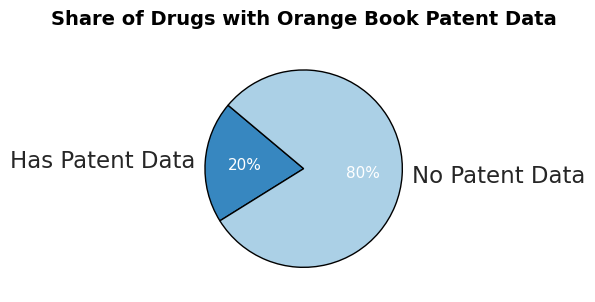

In [30]:

# Calculate values
has_patent = merged_ob["patent_expire_date"].notna().sum()
no_patent  = merged_ob["patent_expire_date"].isna().sum()

# Use same palette as your Seaborn barplot
colors = sns.color_palette("Blues_r", 2)  # reversed blue gradient: light → dark

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    [has_patent, no_patent],
    labels=["Has Patent Data", "No Patent Data"],
    autopct="%1.0f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black", "linewidth": 1},  # match Seaborn's black outline
)

# Make all percent text white
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_color("white")

# Match title and label styling from your barplot
plt.title("Share of Drugs with Orange Book Patent Data",
          fontsize=14, fontweight="bold", color="black", pad=15)

plt.tight_layout()
plt.show()


/tmp/ipykernel_194/1571191727.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


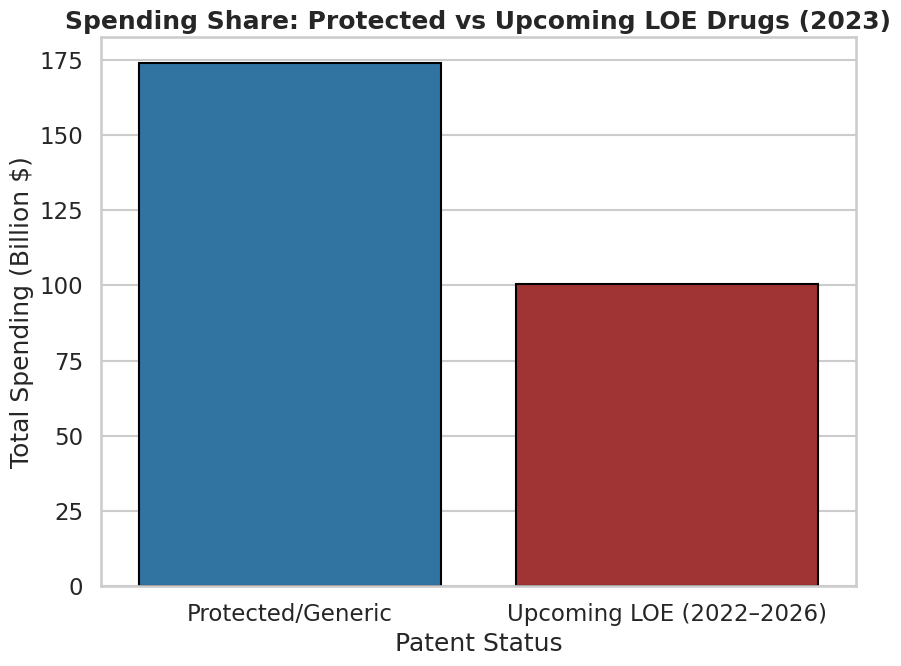

In [85]:
# Create LOE flag and aggregate spending
merged_ob["loe_flag"] = merged_ob["patent_expire_date"].between("2022-01-01", "2026-12-31")
loe_spending = merged_ob.groupby("loe_flag")["total_spending"].sum().reset_index()

# Convert to billions for readability
loe_spending["total_spending_billion"] = loe_spending["total_spending"] / 1e9

# --- Plot ---
plt.figure(figsize=(9,7))
sns.barplot(
    data=loe_spending,
    x="loe_flag",
    y="total_spending_billion",
    palette=["#1f77b4", "#b22222"],  # consistent blue/red
    edgecolor="black"
)

plt.title("Spending Share: Protected vs Upcoming LOE Drugs (2023)", fontweight = "bold")
plt.xlabel("Patent Status")
plt.ylabel("Total Spending (Billion $)")
plt.xticks([0, 1], ["Protected/Generic", "Upcoming LOE (2022–2026)"])
plt.tight_layout()
plt.show()


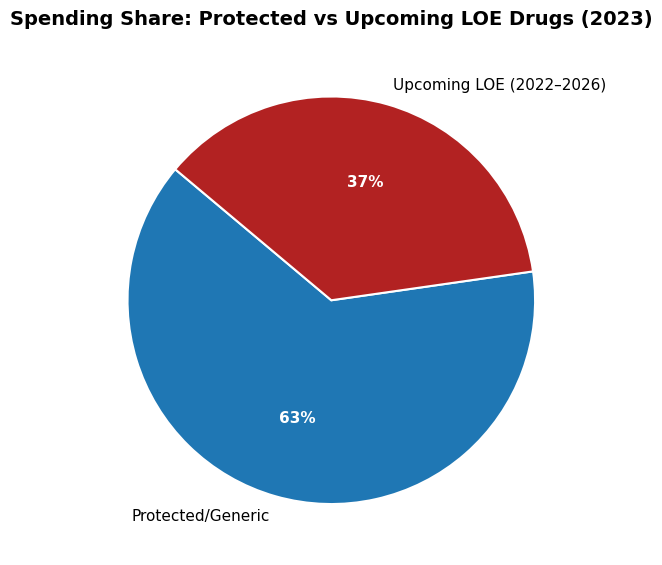

In [86]:
# Ensure LOE share data exists
loe_spending["share_pct"] = 100 * loe_spending["total_spending"] / loe_spending["total_spending"].sum()

# Define labels and colors
labels = ["Protected/Generic", "Upcoming LOE (2022–2026)"]
colors = ["#1f77b4", "#b22222"]

# --- Plot ---
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    loe_spending["share_pct"],
    labels=labels,
    autopct="%1.0f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1.5},
    textprops={"color": "black", "fontsize": 11}  # normal labels
)

# Style the percent text (inside the slices)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")
    autotext.set_fontsize(11)

# Title
plt.title("Spending Share: Protected vs Upcoming LOE Drugs (2023)",
          fontsize=14, fontweight="bold", color="black", pad=15)

plt.tight_layout()
plt.show()


/tmp/ipykernel_194/2257768792.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_194/2257768792.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


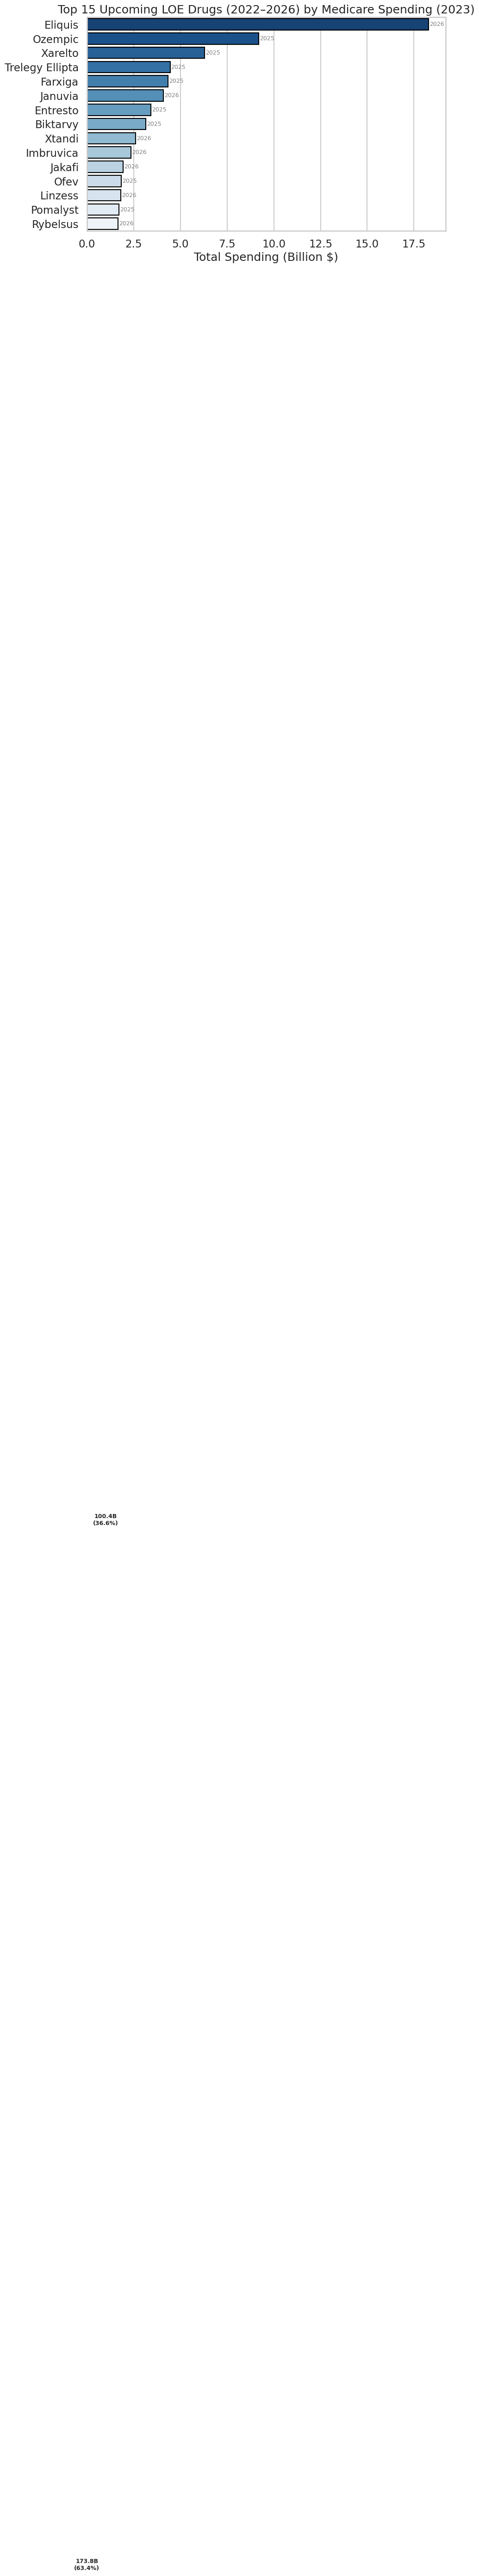

,brand_name,total_spending,patent_expire_date,patent_year,total_spending_billion
1001,Eliquis,1.827345e+10,2026-11-21,2026,18.273452
2343,Ozempic,9.194048e+09,2025-08-13,2025,9.194048
3457,Xarelto,6.309247e+09,2025-02-28,2025,6.309247
3145,Trelegy Ellipta,4.455884e+09,2025-04-27,2025,4.455884
1156,Farxiga,4.342182e+09,2025-04-13,2025,4.342182


In [87]:
# Get top 15 upcoming LOE drugs by total spending
top_loe = (
    merged_ob[merged_ob["loe_flag"]]
    .nlargest(15, "total_spending")[["brand_name", "total_spending", "patent_expire_date", "patent_year"]]
    .copy()
)

# Convert to billions for readability
top_loe["total_spending_billion"] = top_loe["total_spending"] / 1e9
top_loe.sort_values("total_spending_billion", ascending=False, inplace=True)

# --- Plot ---
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_loe,
    x="total_spending_billion",
    y="brand_name",
    palette="Blues_r",
    edgecolor="black"
)

# Title and axis labels
plt.title("Top 15 Upcoming LOE Drugs (2022–2026) by Medicare Spending (2023)")
plt.xlabel("Total Spending (Billion $)")
plt.ylabel("")

# Add patent year labels next to bars
for p, (_, row) in zip(ax.patches, top_loe.iterrows()):
    ax.text(p.get_width() + 0.05, p.get_y() + p.get_height()/2,
            int(row["patent_year"]), va="center", fontsize=9, color="gray")

# Add percentage + total labels from loe_spending
total = loe_spending["total_spending_billion"].sum()
for i, val in enumerate(loe_spending["total_spending_billion"]):
    plt.text(i, val + 5, f"{val:.1f}B\n({val/total*100:.1f}%)",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

top_loe.head()


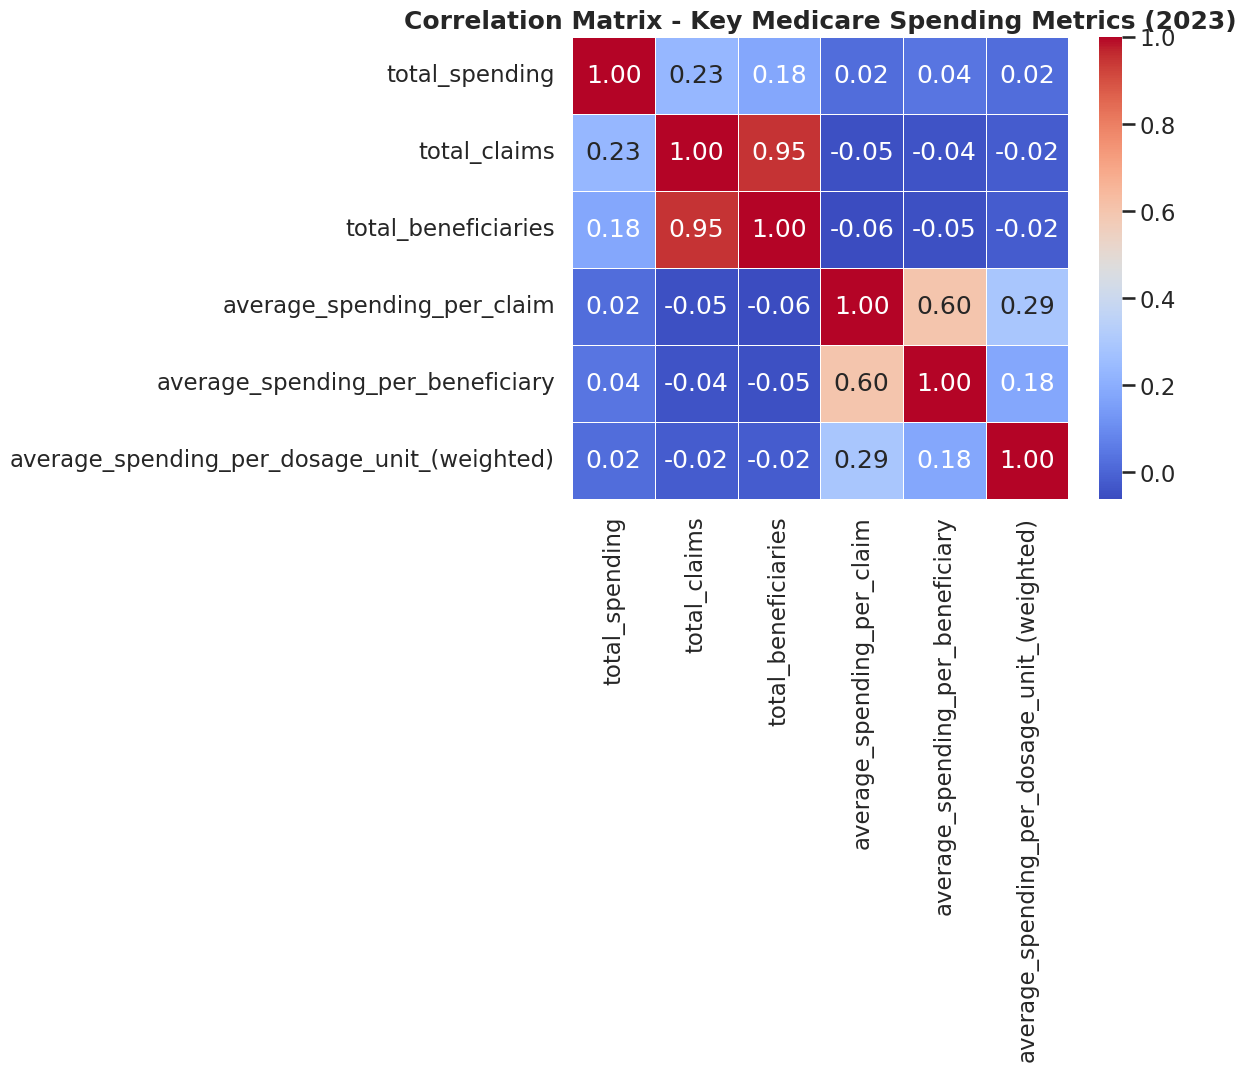

In [88]:
corr_vars = [
    "total_spending",
    "total_claims",
    "total_beneficiaries",
    "average_spending_per_claim",
    "average_spending_per_beneficiary",
    "average_spending_per_dosage_unit_(weighted)"
]

# Compute correlation matrix
corr_matrix = merged_ob[corr_vars].corr().round(2)

# --- Plot ---
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor="white"
)
plt.title("Correlation Matrix - Key Medicare Spending Metrics (2023)", fontweight = "bold")
plt.show()


/tmp/ipykernel_194/3920924472.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


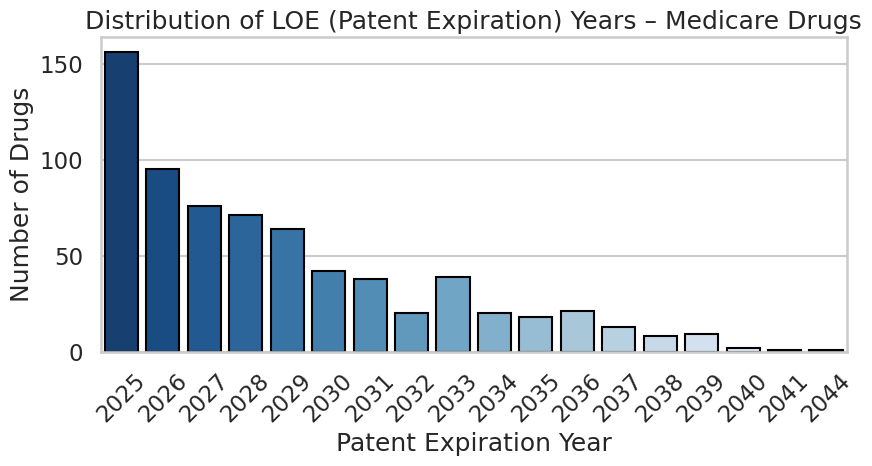

In [89]:
# Count how many drugs per patent year
year_counts = (
    merged_ob.groupby("patent_year")["brand_name"]
    .count()
    .reset_index()
    .rename(columns={"brand_name": "num_drugs"})
)

# Remove missing years
year_counts = year_counts[year_counts["patent_year"].notna()]

# --- Plot ---
plt.figure(figsize=(9,5))
sns.barplot(
    data=year_counts.sort_values("patent_year"),
    x="patent_year",
    y="num_drugs",
    palette="Blues_r",
    edgecolor="black"
)
plt.title("Distribution of LOE (Patent Expiration) Years – Medicare Drugs")
plt.xlabel("Patent Expiration Year")
plt.ylabel("Number of Drugs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


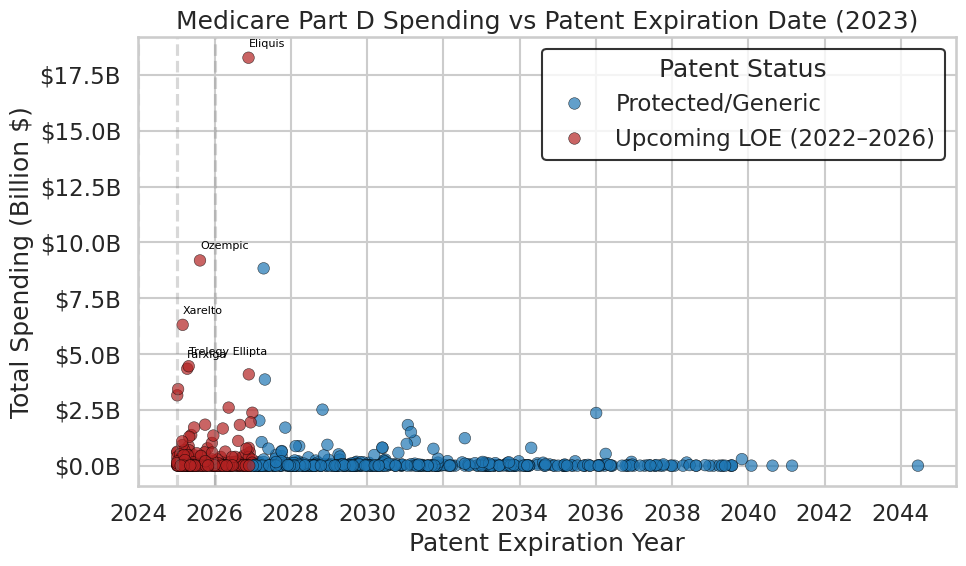

In [90]:
import matplotlib.dates as mdates

# create explicit status labels so palette keys are obvious
plot_data = merged_ob[merged_ob["patent_expire_date"] >= "2024-01-01"].copy()
plot_data["patent_status"] = plot_data["loe_flag"].map({
    True: "Upcoming LOE (2022–2026)",
    False: "Protected/Generic"
})

# palette keyed by label
palette = {
    "Protected/Generic": "#1f77b4",            # blue for protected/generic
    "Upcoming LOE (2022–2026)": "#b22222"      # red for upcoming LOE
}

# plotting
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(
    data=plot_data,
    x="patent_expire_date",
    y="total_spending",
    hue="patent_status",
    hue_order=["Protected/Generic", "Upcoming LOE (2022–2026)"],  # fixes order
    palette=palette,
    alpha=0.7,
    s=70,
    edgecolor="black",
    linewidth=0.4,
    ax=ax
)

# axis formatting
ax.set_title("Medicare Part D Spending vs Patent Expiration Date (2023)")
ax.set_xlabel("Patent Expiration Year")
ax.set_ylabel("Total Spending (Billion $)")
ax.yaxis.set_major_formatter(lambda x, _: f"${x/1e9:.1f}B")

# x-axis ticks and limits: start at 2024 and extend a bit to the max
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.to_datetime("2024-01-01"), plot_data["patent_expire_date"].max() + pd.Timedelta(days=365))

# dashed LOE window lines (optional)
for year in range(2022, 2027):
    ax.axvline(pd.to_datetime(f"{year}-01-01"), color="gray", linestyle="--", alpha=0.3)

# label top 5 upcoming LOE drugs
top5 = plot_data[plot_data["loe_flag"]].nlargest(5, "total_spending")
for _, row in top5.iterrows():
    ax.text(row["patent_expire_date"], row["total_spending"] + 0.5e9,
            row["brand_name"], fontsize=8, color="black")

# tidy up legend
leg = ax.legend(title="Patent Status", loc="upper right", frameon=True, edgecolor="black")
plt.tight_layout()
plt.show()


In [91]:
# --- Before Cleaning ---
print("FDA Orange Book Products:", products.shape)
print("FDA Orange Book Patents:", patent.shape)
print("FDA Orange Book Exclusivity:", exclusivity.shape)
print("Merged CMS + FDA (initial join):", merged_ob.shape)

print("CMS Part D 2023 subset:", dashboard_2023.shape)
print("FDA Orange Book merged (Products + Patents + Exclusivity):", orangebook.shape)
print("Final Merged CMS + FDA:", merged_ob.shape)

# --- Structure Summary ---
print("\nColumn Summary (Cleaned Data):")
print("CMS Part D 2023 Columns:", list(dashboard_2023.columns))
print("FDA Orange Book Columns:", list(orangebook.columns))
print("Merged CMS + FDA Columns:", list(merged_ob.columns))

FDA Orange Book Products: (47133, 14)
FDA Orange Book Patents: (20639, 11)
FDA Orange Book Exclusivity: (2287, 5)
Merged CMS + FDA (initial join): (3474, 19)
CMS Part D 2023 subset: (3598, 14)
FDA Orange Book merged (Products + Patents + Exclusivity): (1246, 3)
Final Merged CMS + FDA: (3474, 19)

Column Summary (Cleaned Data):
CMS Part D 2023 Columns: ['brand_name', 'generic_name', 'number_of_manufacturers', 'total_spending', 'total_dosage_units', 'total_claims', 'total_beneficiaries', 'average_spending_per_dosage_unit_(weighted)', 'average_spending_per_claim', 'average_spending_per_beneficiary', 'outlier_flag', 'year', 'drug_type', 'brand_name_clean']
FDA Orange Book Columns: ['trade_name_clean', 'patent_expire_date', 'patent_year']
Merged CMS + FDA Columns: ['brand_name', 'generic_name', 'number_of_manufacturers', 'total_spending', 'total_dosage_units', 'total_claims', 'total_beneficiaries', 'average_spending_per_dosage_unit_(weighted)', 'average_spending_per_claim', 'average_spendin

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af057222-3fdc-4af3-880a-2119daf62f90' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>